In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import os
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance,KElbowVisualizer

In [3]:
%load_ext pycodestyle_magic

In [4]:
%flake8_on

In [9]:
path = 'E:\\Data_Science\\OpenClassRoom\\Projet 5\\archive'
x = input('Labtop ? [y/n]')
if x == 'y':
    path = r'C:\Users\Nico Janko\Documents\
    Data_Science\OpenClassRoom\Projet 5\archive'

Labtop ? [y/n] n


5:80: E501 line too long (92 > 79 characters)


In [6]:

cust_df = pd.read_csv(path + '\\olist_customers_dataset.csv')
geo_df = pd.read_csv(path + '\\olist_geolocation_dataset.csv')
ord_it_df = pd.read_csv(path + '\\olist_order_items_dataset.csv')
ord_pay_df = pd.read_csv(path + '\\olist_order_payments_dataset.csv')
ord_rev_df = pd.read_csv(path + '\\olist_order_reviews_dataset.csv')
ord_df = pd.read_csv(path + '\\olist_orders_dataset.csv')
prod_df = pd.read_csv(path + '\\olist_products_dataset.csv')
sell_df = pd.read_csv(path + '\\olist_sellers_dataset.csv')

In [7]:
dfs = {0: cust_df,
       1: geo_df,
       2: ord_it_df,
       3: ord_pay_df,
       4: ord_rev_df,
       5: ord_df,
       6: prod_df,
       7: sell_df
       }

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-n

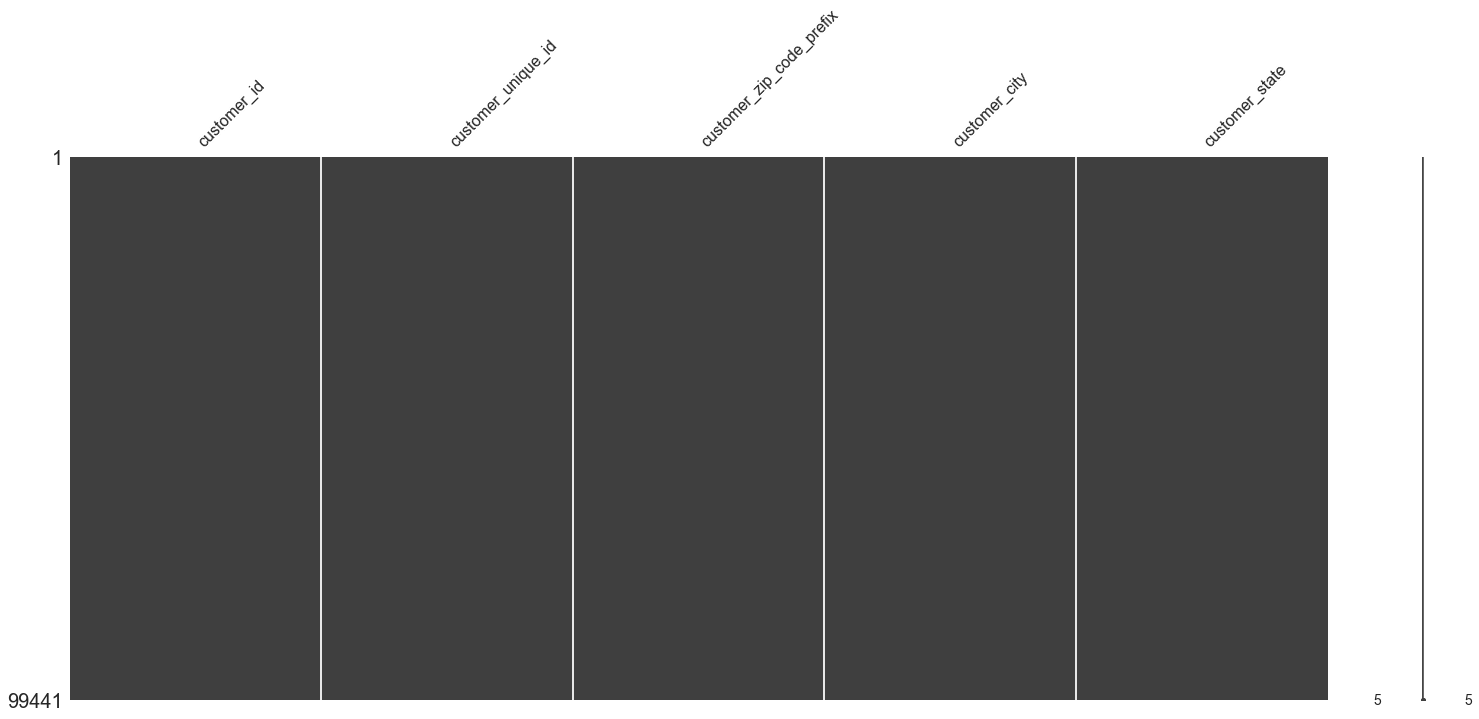

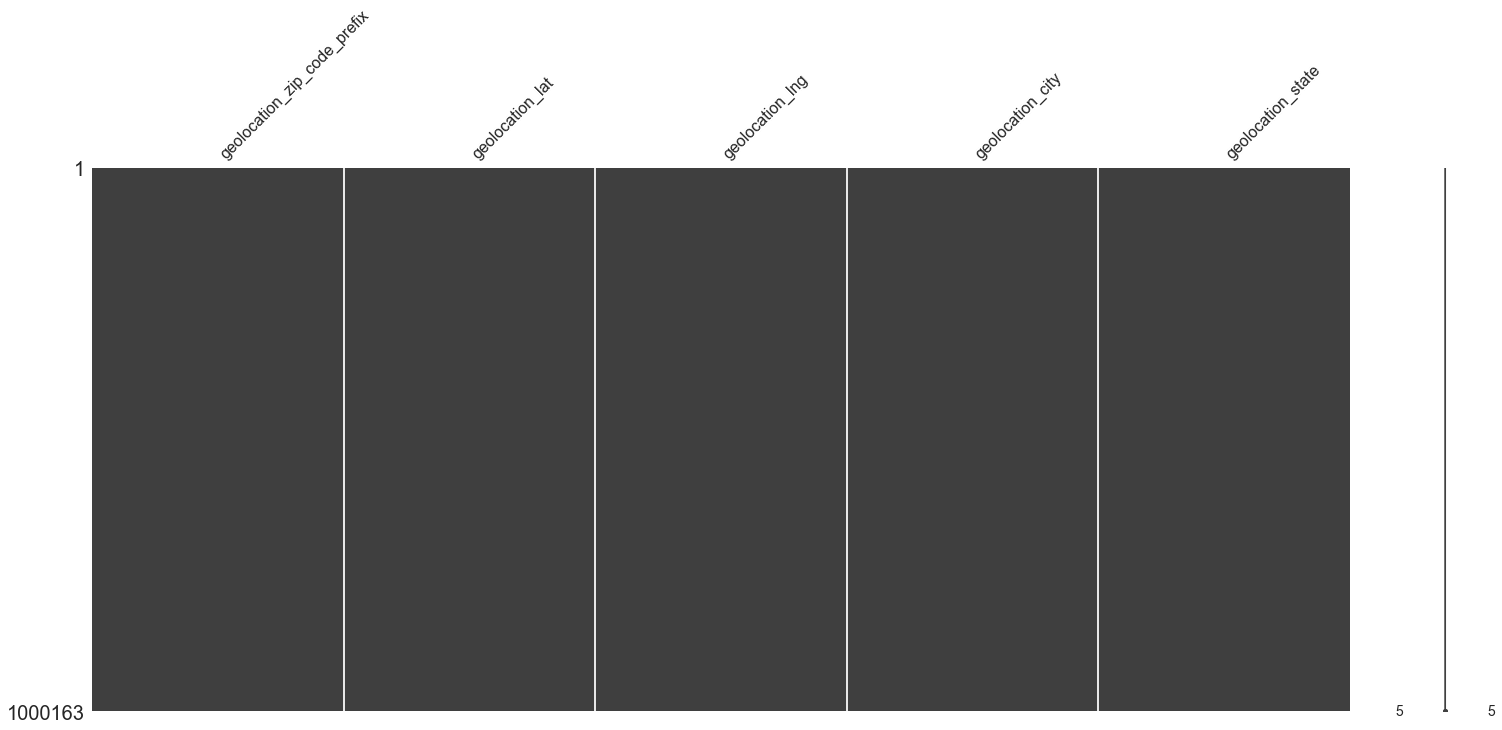

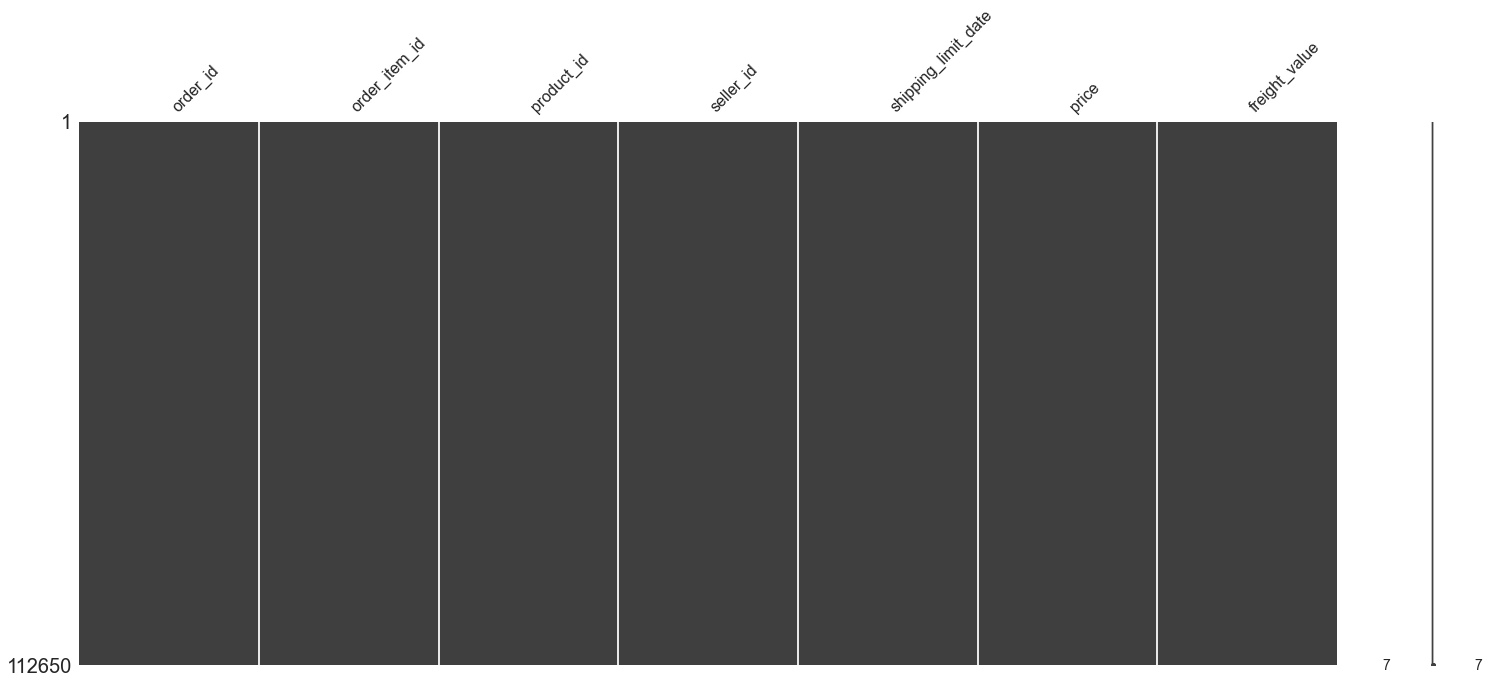

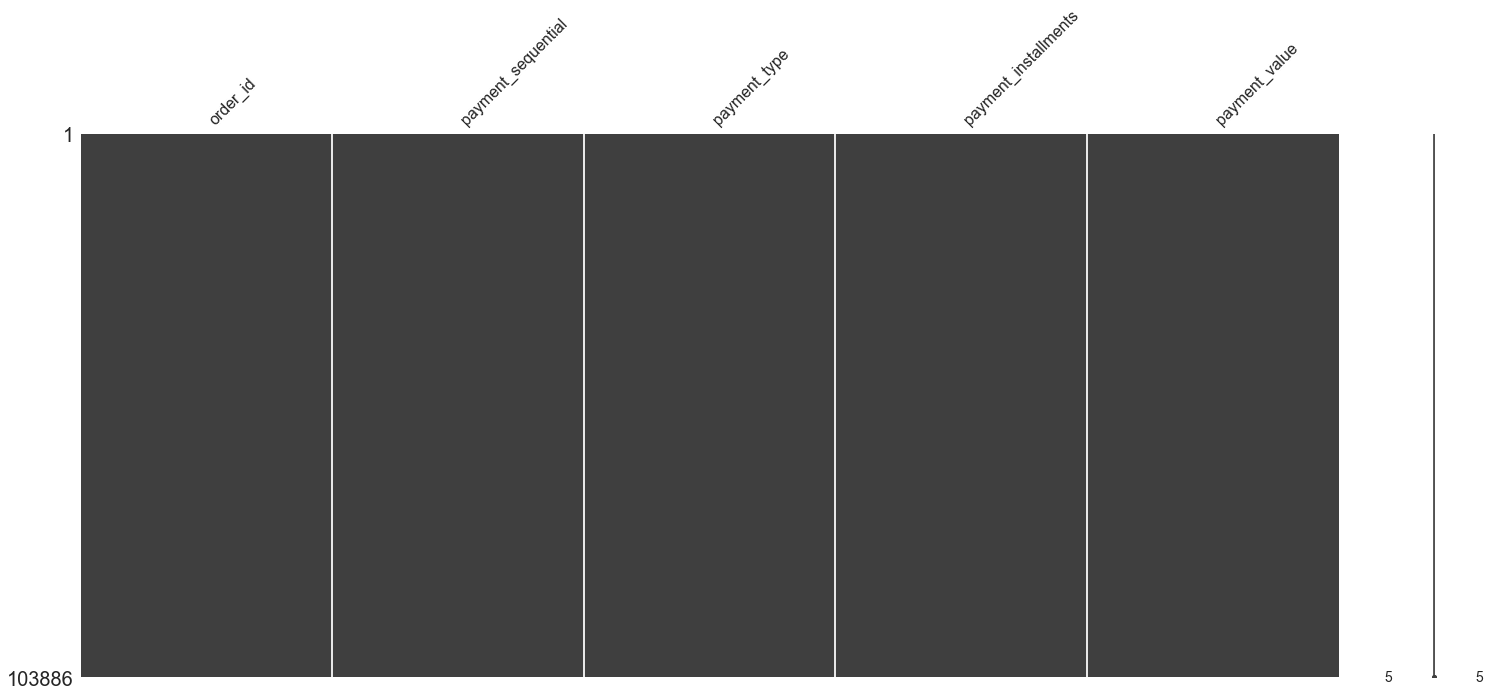

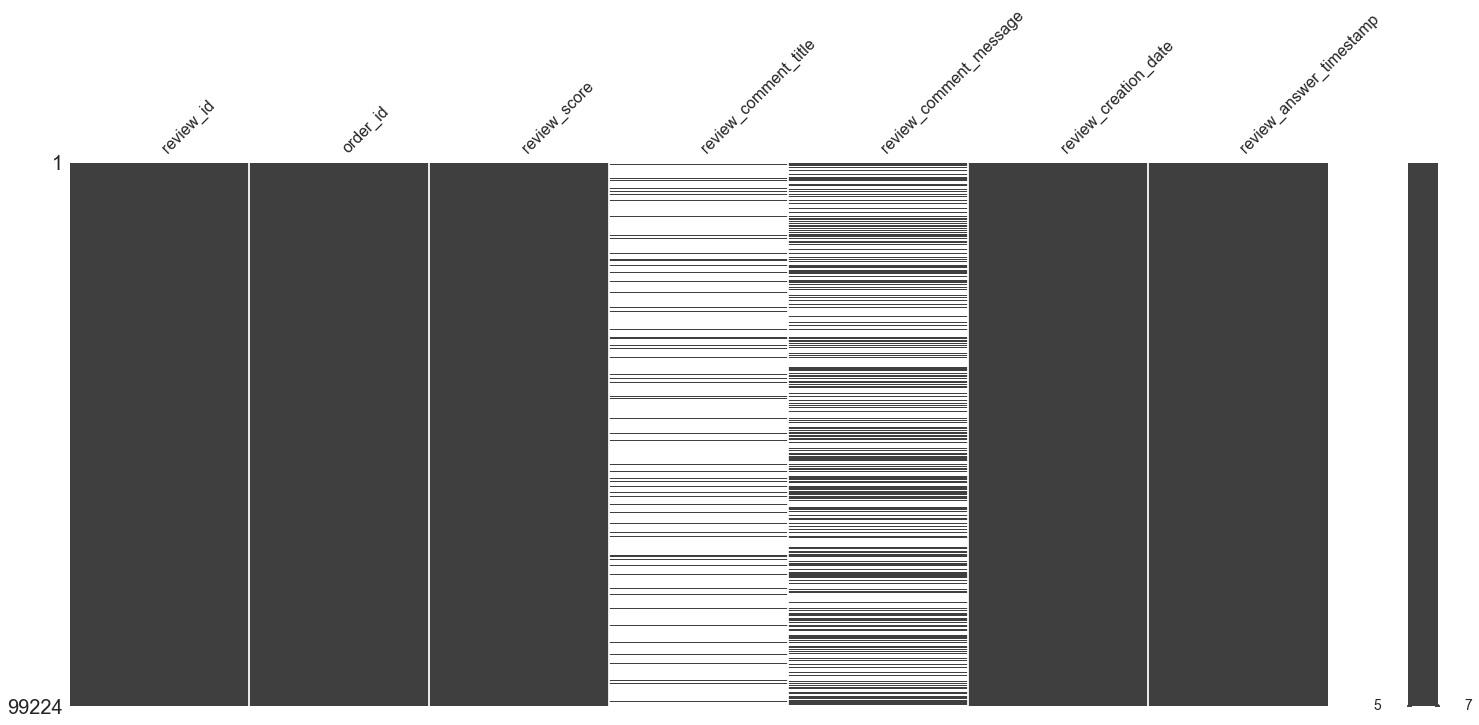

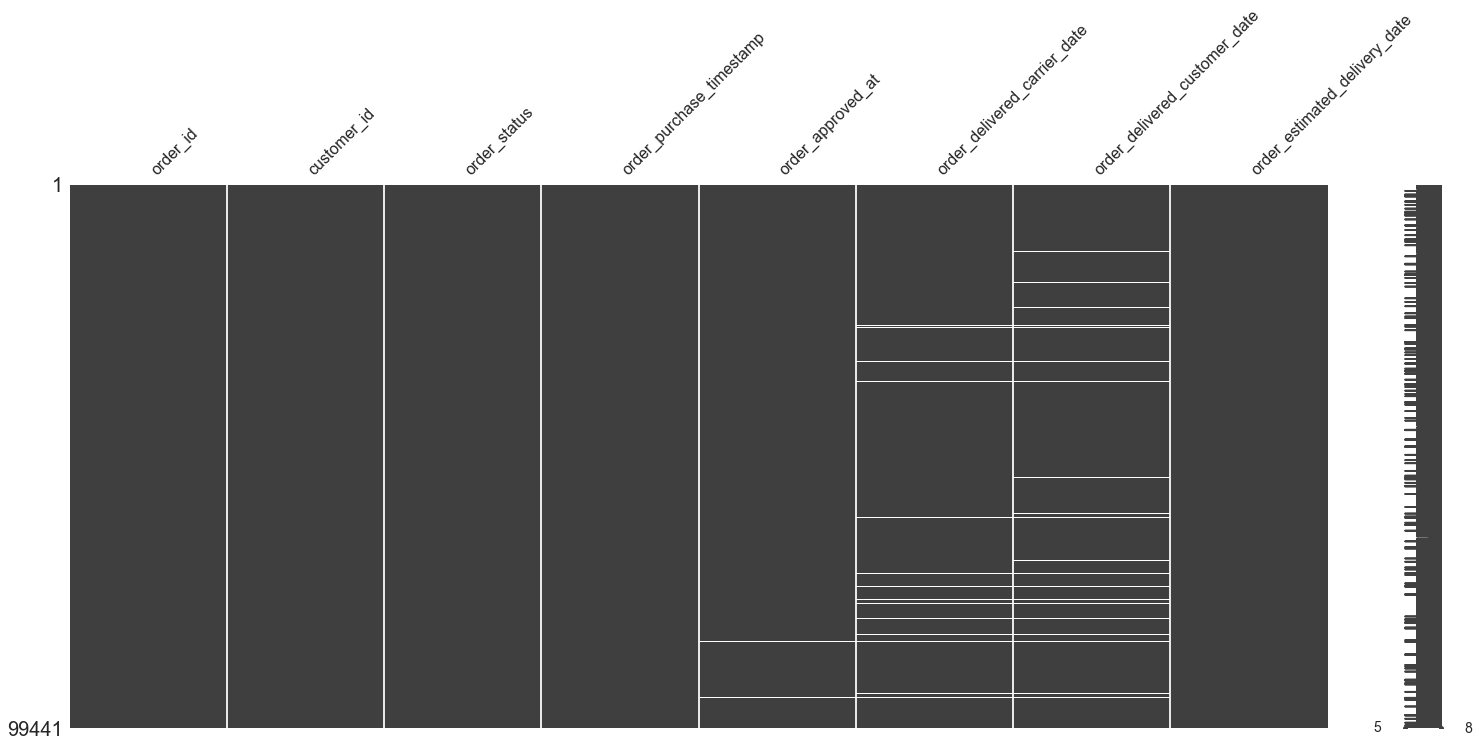

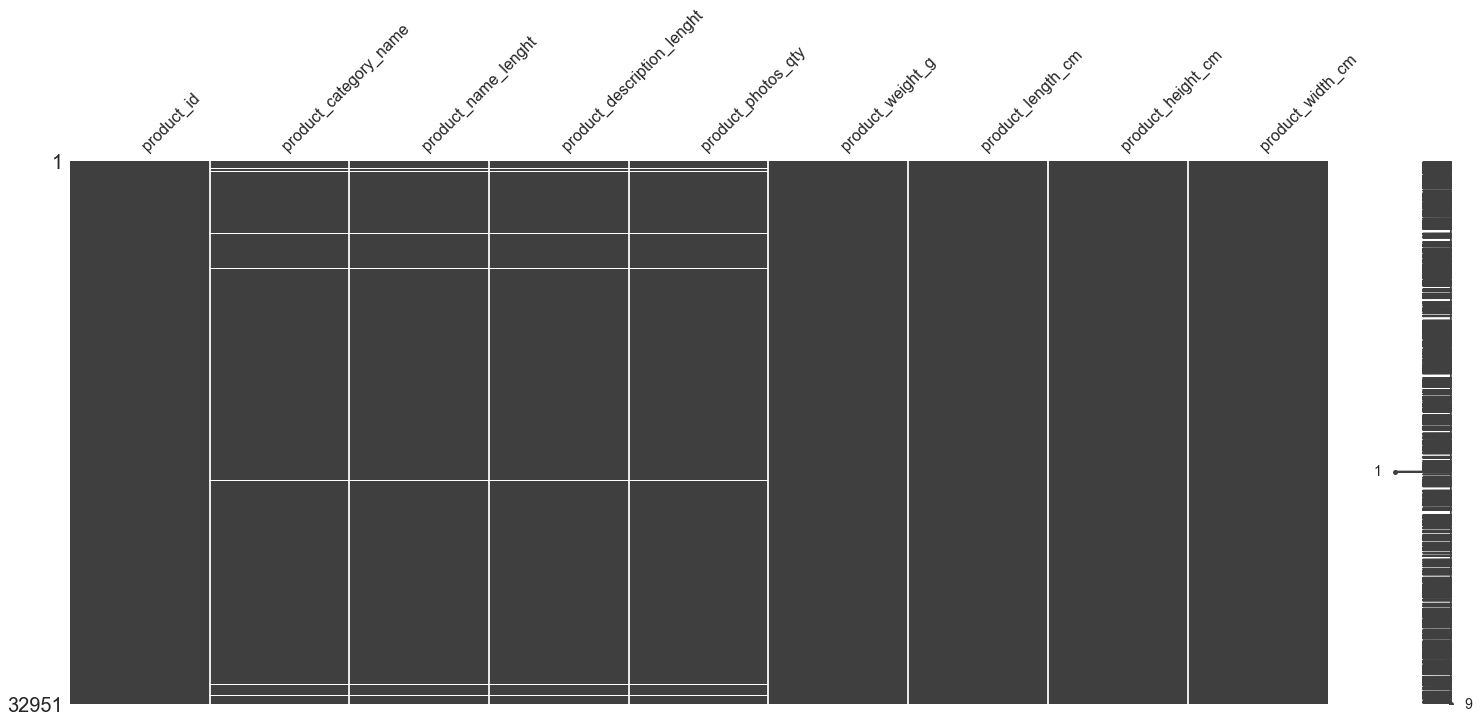

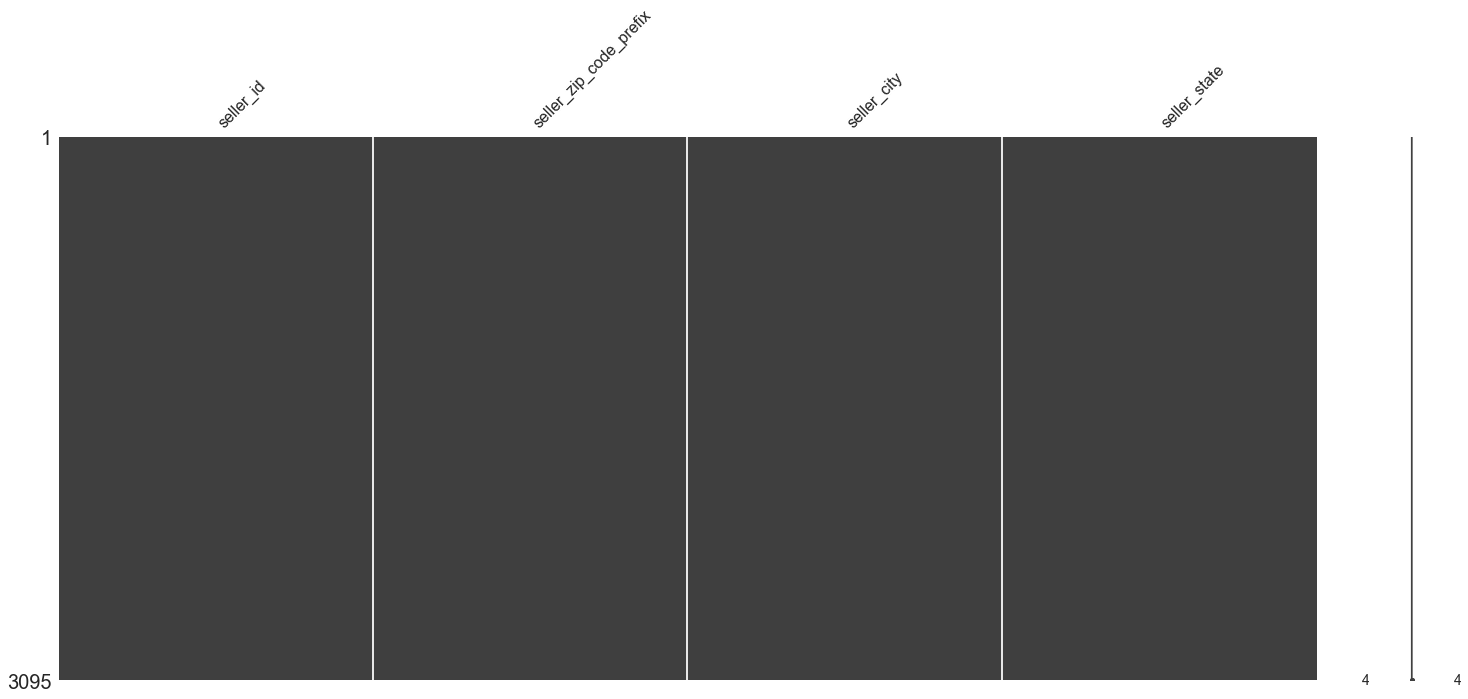

In [8]:
for i in dfs:
    print(dfs[i].info())
    msno.matrix(dfs[i])
    plt.savefig(f'msno_df{i}.png', bbox_inches='tight')

In [11]:
# get the customers that ordered more than once
multi_cust_df = dfs[0][dfs[0].groupby('customer_unique_id')
                       .customer_unique_id.transform('count') > 1]

# get their customer_id
multi_custom = multi_cust_df[['customer_id', 'customer_unique_id']]
multi_id = multi_custom['customer_id']
multi_uni_id = multi_custom['customer_unique_id']
# get their order_id
multi_order_df = dfs[5][dfs[5]['customer_id'].isin(multi_id)]
multi_order_id = multi_order_df['order_id']

multi_pay_df = dfs[3][dfs[3]['order_id'].isin(multi_order_id)]
# get their review score
multi_rev_df = dfs[4][dfs[4]['order_id'].isin(multi_order_id)]

# get the category of each order
multi_prod_df = dfs[2][dfs[2]['order_id'].isin(multi_order_id)]
multi_prod_id = multi_prod_df['product_id']
multi_cat_df = dfs[6][dfs[6]['product_id'].isin(multi_prod_id)].set_index('product_id')

cat_ser = multi_cat_df['product_category_name']
multi_prod_df = multi_prod_df.join(cat_ser, on='product_id')
# 74 product don't have a category name
multi_prod_df = multi_prod_df.dropna(subset='product_category_name')

20:80: E501 line too long (87 > 79 characters)


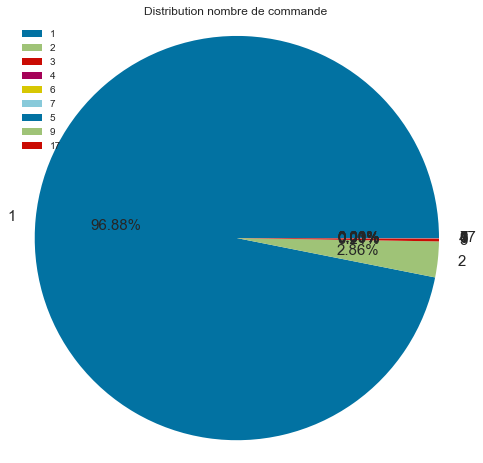

In [12]:
temp = dfs[0][dfs[0].groupby('customer_unique_id')
                    .customer_unique_id.transform('count') > 0]
temp = temp[['customer_id', 'customer_unique_id']]
temp2 = dfs[5][dfs[5]['customer_id'].isin(temp['customer_id'])]
temp = temp.set_index('customer_id')
temp = temp.join(temp2[['customer_id', 'order_id']].set_index('customer_id'))
graph = pd.DataFrame()
graph['n_order'] = temp.groupby('customer_unique_id').order_id.count()

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(graph['n_order'].value_counts(),
       labels=graph['n_order'].unique(),
       autopct='%1.2f%%',
       textprops=dict(fontsize=15)
       )
ax.set_title('Distribution nombre de commande')
ax.axis('equal')
ax.legend(loc='upper left')
fig.savefig('distrib_n_order.png', bbox_inches='tight')

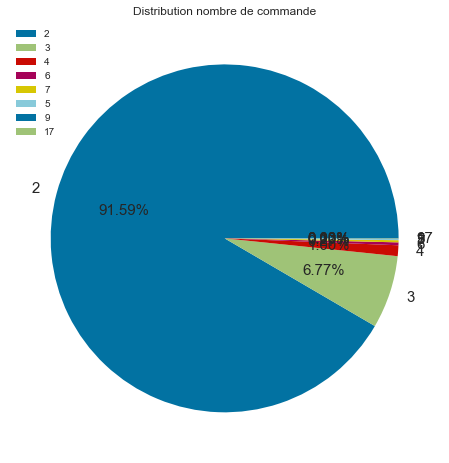

In [14]:
temp = dfs[0][dfs[0].groupby('customer_unique_id')
                    .customer_unique_id.transform('count') > 1]
temp = temp[['customer_id', 'customer_unique_id']]
temp2 = dfs[5][dfs[5]['customer_id'].isin(temp['customer_id'])]
temp = temp.set_index('customer_id')
temp = temp.join(temp2[['customer_id', 'order_id']].set_index('customer_id'))
graph = pd.DataFrame()
graph['n_order'] = temp.groupby('customer_unique_id').order_id.count()

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(graph['n_order'].value_counts(),
       labels=graph['n_order'].unique(),
       autopct='%1.2f%%',
       textprops=dict(fontsize=15)
       )
ax.set_title('Distribution nombre de commande')
ax.legend(loc='upper left')
fig.savefig('distrib_n_order2.png', bbox_inches='tight')

In [15]:
x = dfs[0]['customer_id'].unique().shape[0]
y = dfs[0]['customer_unique_id'].unique().shape[0]
print(x, y, 1-(y/x))
print('Unique orders : {}'.format(dfs[2]['order_id'].unique().shape[0]))
print('Products : {}'.format(dfs[6]['product_id'].unique().shape[0]))
print('Products category : {}'
      .format(dfs[6]['product_category_name'].unique().shape[0]))
print('Sellers : {}'.format(dfs[7]['seller_id'].unique().shape[0]))
print('% of non delivered products : {}'
      .format(dfs[5]['order_delivered_customer_date'].isnull().sum()/dfs[5].shape[0]*100))
print('% of non commented orders : {}'
      .format(dfs[4]['review_comment_message'].isnull().sum()/dfs[4].shape[0]*100))

10:80: E501 line too long (90 > 79 characters)
12:80: E501 line too long (83 > 79 characters)


99441 96096 0.033638036624732304
Unique orders : 98666
Products : 32951
Products category : 74
Sellers : 3095
% of non delivered products : 2.981667521444877
% of non commented orders : 58.70253164556962


In [16]:
import time
import datetime


def days(x):
    td = time.mktime(datetime.datetime
                     .strptime('2018-10-18 00:00:00',
                               "%Y-%m-%d %H:%M:%S").timetuple())
    # date of last order
    t = time.mktime(datetime.datetime
                    .strptime(str(x),
                              "%Y-%m-%d %H:%M:%S").timetuple())
    d = int((td - t)/86400)
    # convert to day
    return d

In [17]:
def cat_name(x):
    y = set()
    for i in x:
        if i not in y:  # check if the category is not already in the set
            y.add(i)
    y = str(y)
    return y

In [21]:
# build the working df of each order
# take the customer id
df = pd.DataFrame(multi_custom)
df = df.set_index('customer_id')
df = df.join(multi_order_df[['customer_id',
                             'order_id',
                             'order_purchase_timestamp']]
             .set_index('customer_id'))
# take the value of each order
temp = pd.DataFrame()
temp['order_total'] = multi_pay_df.groupby('order_id').payment_value.sum()
# some order have voucher
df = df.join(temp, on='order_id')
# calculate the days since order of each order
df['days_since_order'] = df['order_purchase_timestamp'].apply(days)
# take the review score for each order
temp = pd.DataFrame(index=multi_rev_df.index)
temp['review_days'] = multi_rev_df['review_creation_date'].apply(days)
temp = temp.join(multi_rev_df[['order_id',
                               'review_score']]
                 )
agg_fun = {'review_days': ['min'],
           'review_score': ['mean']}
temp = temp.groupby('order_id').agg(agg_fun)
df = df.join(temp, on='order_id', how='right')
df = df.drop(df.columns[5], axis=1)
df = df.rename(columns={df.columns[5]: 'review_score'})

# take the product category of each order
temp = pd.DataFrame(multi_prod_df.groupby('order_id').product_category_name.agg(lambda x: tuple(x)))
temp['product_category_name'] = temp.applymap(cat_name)
# some orders have mulitple items from the same category
df = df.join(temp, on='order_id')
df = df.dropna(subset='product_category_name')

df = df[df.groupby('customer_unique_id')
        .customer_unique_id.transform('count') > 1]
# some customer didn't review all their orders
print(df.info(), df.head())
df.to_csv('df.csv', index=False)

E:\temp\ipykernel_13764\3860387149.py:25: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  df = df.join(temp, on='order_id', how='right')
30:80: E501 line too long (100 > 79 characters)


<class 'pandas.core.frame.DataFrame'>
Index: 5929 entries, f6dd3ec061db4e3987629fe6b26e5cce to c5d108ecadaedf367e995520d36c9b1d
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_unique_id        5929 non-null   object 
 1   order_id                  5929 non-null   object 
 2   order_purchase_timestamp  5929 non-null   object 
 3   order_total               5929 non-null   float64
 4   days_since_order          5929 non-null   int64  
 5   review_score              5929 non-null   float64
 6   product_category_name     5929 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 370.6+ KB
None                                                 customer_unique_id  \
customer_id                                                          
f6dd3ec061db4e3987629fe6b26e5cce  eb28e67c4c0b83846050ddfb8a35d051   
8085a9af46f619bc25966f151a362b0d  98758d88bf4b8eef1372ddee45d63178

In [28]:
# build the model df
md_df = pd.DataFrame(index=df['customer_unique_id'].unique())

# feature0  = number of order
md_df['n_order'] = df.groupby('customer_unique_id').order_id.count()

# feature1  = total value of orders
# md_df['payment_total'] = df.groupby('customer_unique_id').order_total.agg('sum')

# feature2-3  = mean and std of orders
md_df['payment_mean'] = df.groupby('customer_unique_id').order_total.agg('mean')
md_df['payment_std'] = df.groupby('customer_unique_id').order_total.agg('std')

# feature frequency4-10 of order on the distrib
df['order_dis'] = pd.cut(df['order_total'],
                         50,
                         duplicates='drop'
                         )
temp = pd.crosstab(df['customer_unique_id'],
                   df['order_dis'],
                   values=df['order_dis'],
                   aggfunc='count',
                   margins=True
                   )
temp = temp.dropna(axis=1, how='any')  # drop empty buckets
for i in range(temp.shape[1]):
    temp.iloc[:, i] = round((temp.iloc[:, i]/temp.iloc[:, -1])*100, 2)

temp = temp.drop(labels='All')
temp = temp.drop(labels='All', axis=1)
md_df = md_df.join(temp)
print(md_df.info())
# feature frequency11-135 of category
temp = pd.crosstab(index=df['customer_unique_id'],
                   columns=df['product_category_name'],
                   values=df['product_category_name'],
                   aggfunc='count',
                   margins=True
                   ).fillna(0)

for i in range(temp.shape[1]):
    temp.iloc[:, i] = round((temp.iloc[:, i]/temp.iloc[:, -1])*100, 2)
temp = temp.drop(labels='All')
temp = temp.drop(labels='All', axis=1)
md_df = md_df.join(temp)
print(md_df.info())
# feature136-137 review score mean and std
md_df['rev_mean'] = df.groupby('customer_unique_id').review_score.agg('mean')
md_df['rev_std'] = df.groupby('customer_unique_id').review_score.agg('std')
# feature138  = days since last order
md_df['days_since_last_order'] = df.groupby('customer_unique_id').days_since_order.agg('min')
# feature139 = "age" of the custumer
md_df['age'] = df.groupby('customer_unique_id').days_since_order.agg('max')


print(md_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2808 entries, eb28e67c4c0b83846050ddfb8a35d051 to acc4424c209233de519e034152f30304
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   n_order               2808 non-null   int64  
 1   payment_mean          2808 non-null   float64
 2   payment_std           2808 non-null   float64
 3   (6.621, 110.336]      2808 non-null   float64
 4   (110.336, 209.111]    2808 non-null   float64
 5   (209.111, 307.887]    2808 non-null   float64
 6   (307.887, 406.662]    2808 non-null   float64
 7   (406.662, 505.438]    2808 non-null   float64
 8   (505.438, 604.214]    2808 non-null   float64
 9   (604.214, 702.989]    2808 non-null   float64
 10  (702.989, 801.765]    2808 non-null   float64
 11  (801.765, 900.54]     2808 non-null   float64
 12  (900.54, 999.316]     2808 non-null   float64
 13  (999.316, 1098.092]   2808 non-null   float64
 14  (1098.092, 1196.86

8:80: E501 line too long (82 > 79 characters)
11:80: E501 line too long (80 > 79 characters)
51:80: E501 line too long (93 > 79 characters)


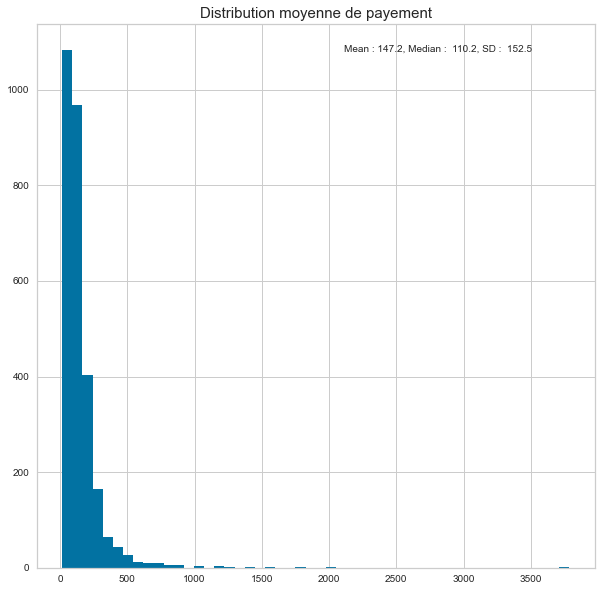

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(md_df['payment_mean'],
        bins=50
        )
ax.text(0.55, 0.95,
        'Mean : {:.1f}, Median : {: .1f}, SD : {: .1f}'
        .format(md_df['payment_mean'].mean(),
                md_df['payment_mean'].median(),
                md_df['payment_mean'].std()),
        transform=ax.transAxes
        )
ax.set_title('Distribution moyenne de payement', fontsize=15)
plt.show()
fig.savefig('distrib_payement.png', bbox_inches='tight')

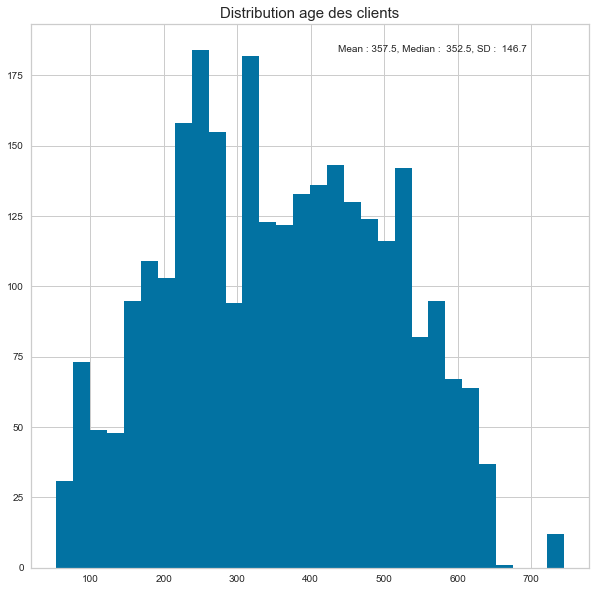

3:13: E231 missing whitespace after ','


In [31]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(md_df['age'], bins=30)
ax.text(0.55, 0.95,
        'Mean : {:.1f}, Median : {: .1f}, SD : {: .1f}'
        .format(md_df['age'].mean(),
                md_df['age'].median(),
                md_df['age'].std()
                ),
        transform=ax.transAxes
        )
ax.set_title('Distribution age des clients', fontsize=15)
plt.show()
fig.savefig('distrib_age.png', bbox_inches='tight')

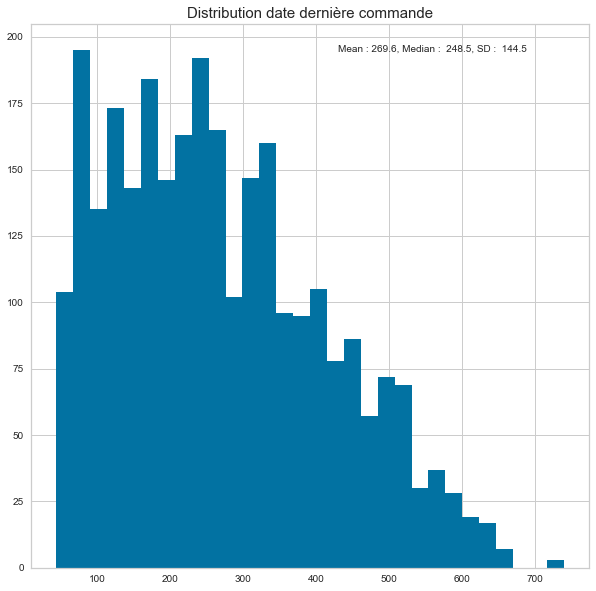

9:18: E251 unexpected spaces around keyword / parameter equals
9:20: E251 unexpected spaces around keyword / parameter equals


In [32]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(md_df['days_since_last_order'], bins=30)
ax.text(0.55, 0.95,
        'Mean : {:.1f}, Median : {: .1f}, SD : {: .1f}'
        .format(md_df['days_since_last_order'].mean(),
                md_df['days_since_last_order'].median(),
                md_df['days_since_last_order'].std()
                ),
        transform=ax.transAxes
        )
ax.set_title('Distribution date dernière commande', fontsize=15)
plt.show()
fig.savefig('distrib_days_since.png', bbox_inches='tight')

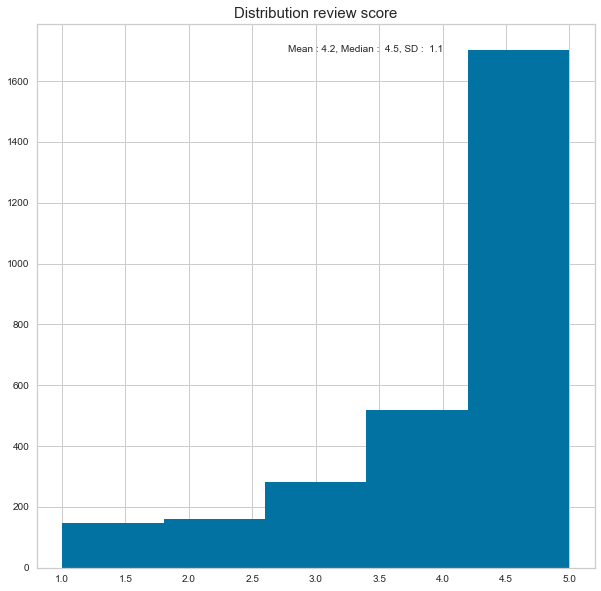

In [33]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(md_df['rev_mean'], bins=5)
ax.text(0.45, 0.95,
        'Mean : {:.1f}, Median : {: .1f}, SD : {: .1f}'
        .format(md_df['rev_mean'].mean(),
                md_df['rev_mean'].median(),
                md_df['rev_mean'].std()
                ),
        transform=ax.transAxes
        )
ax.set_title('Distribution review score', fontsize=15)
plt.show()
fig.savefig('distrib_rev.png', bbox_inches='tight')

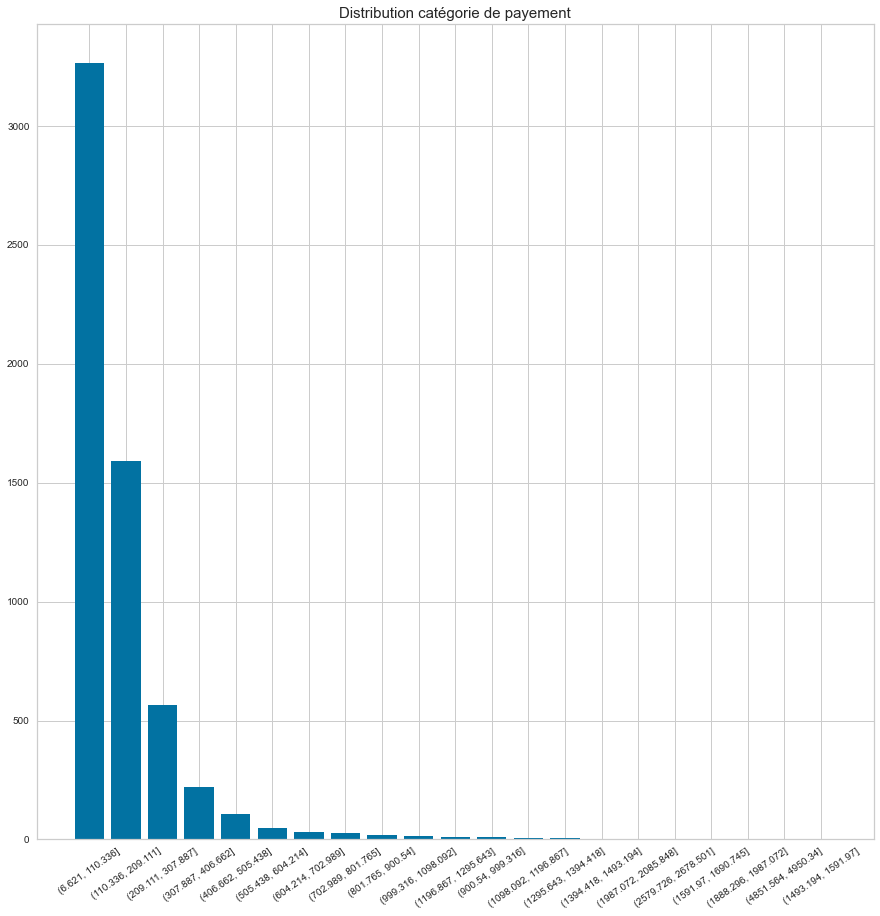

In [34]:
val = pd.DataFrame(df['order_dis'].value_counts())
val = val.loc[val['order_dis'] != 0]
fig, ax = plt.subplots(figsize=(15, 15))
ax.bar(list(val.index.astype(str)),
       val['order_dis']
       )
ax.tick_params(axis='x', labelrotation=35)
ax.set_title('Distribution catégorie de payement', fontsize=15)
plt.show()
fig.savefig('distrib_order_dis.png', bbox_inches='tight')

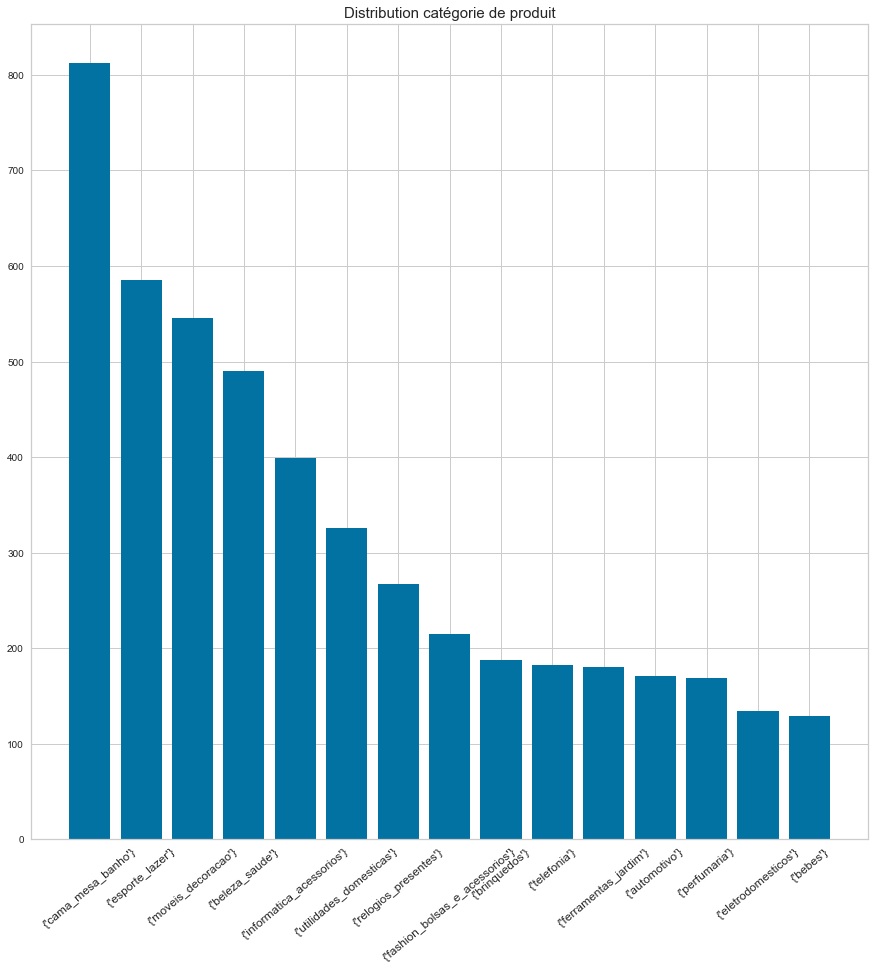

In [37]:
temp = pd.crosstab(df['product_category_name'],
                   df['customer_unique_id'],
                   values=df['product_category_name'],
                   aggfunc='count',
                   margins=True
                   ).fillna(0)
temp = pd.DataFrame(temp['All'])
temp = temp.sort_values(by='All', ascending=False)
temp = temp.drop(labels='All')
fig, ax = plt.subplots(figsize=(15, 15))
ax.bar(list(temp.head(15).index),
       temp.head(15)['All']
       )
ax.tick_params(axis='x', labelrotation=40, labelsize=12)
ax.set_title('Distribution catégorie de produit', fontsize=15)
plt.show()
fig.savefig('distrib_cat_dis.png', bbox_inches='tight')

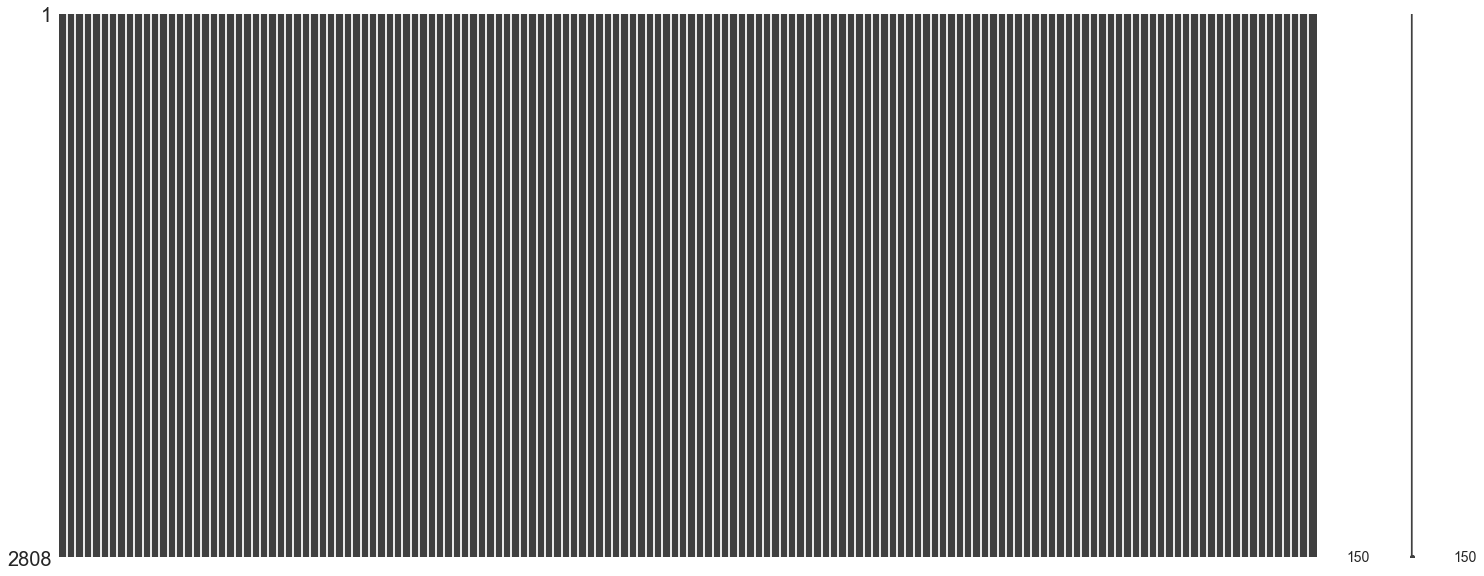

In [38]:
msno.matrix(md_df)
plt.savefig('msno_df_finale.png', bbox_inches='tight')

In [39]:
md_df.to_csv('md_df.csv', index=False)

#### 